In [1]:
import numpy as np
import matplotlib.pyplot as plt

### With this code I do the numerical simulation for the tent map and upside-down tent map in combination with trend extrapolating. It also gives multiple graphs which can be used to give information about the dynamics.

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_11924\3634330708.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return 2 * x / (1 + beta)


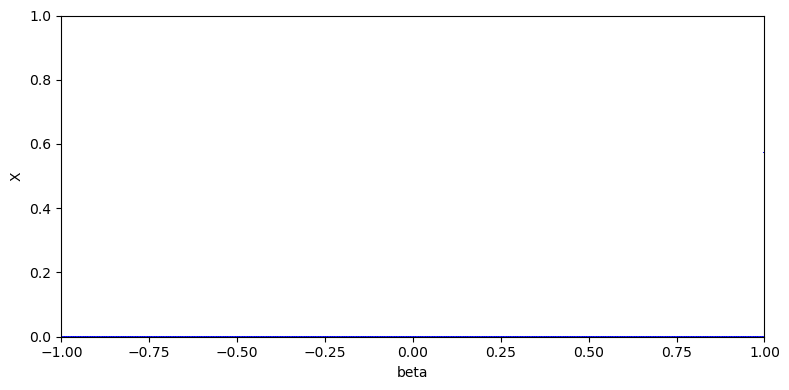

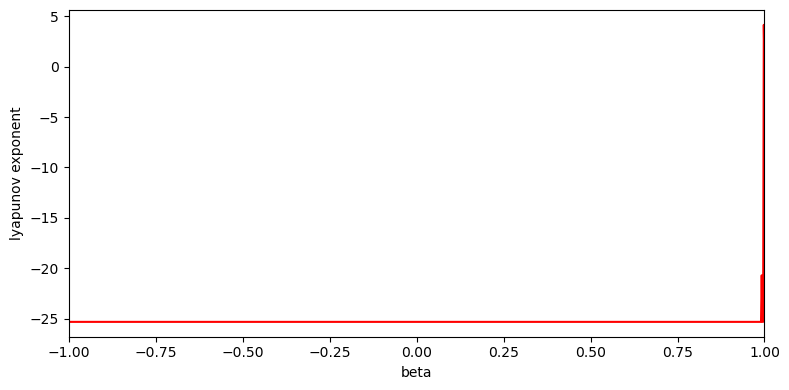

In [3]:
# Define the asymmetric tent map
def tent_map_scalar(x, beta):
    if x <= (1 + beta) / 2 and x >= 0:
        return 2 * x / (1 + beta)
    elif x > (1 + beta) / 2 and x <= 1:
        return 2 * (1 - x) / (1 - beta)
    elif x < 0:
        return 0
    else:
        return 1

def tent_map_scalar_ud(x, beta):
    return 1 - tent_map_scalar(x, beta)

def trend_extrapolating_learning_forecast(x, t, g):
    forecast = x[t - 2] + g*(x[t - 2] - x[t - 3])
    if forecast > 1:
        forecast = 1
    elif forecast < 0:
        forecast = 0
    return forecast

# Simulate the system under learning by average
def simulate_trend_extrapolating_learning(beta, x0, x1, g, tent, T=1000, burn_in=200):
    x_vals = np.zeros(T)
    forecast_vals = np.zeros(T + 1)
    x_vals[0] = x0
    x_vals[1] = x1
    if tent=="tent":
        for t in range(2, T):
            forecast_vals[t + 1] = trend_extrapolating_learning_forecast(x_vals, t + 1, g)
            x_vals[t] = tent_map_scalar(forecast_vals[t + 1], beta)
    elif tent=="tent_ud":
        for t in range(2, T):
            forecast_vals[t + 1] = trend_extrapolating_learning_forecast(x_vals, t + 1, g)
            x_vals[t] = tent_map_scalar_ud(forecast_vals[t + 1], beta)
    else:
        return False
    # Do not include the first 200 values
    return x_vals[burn_in:], forecast_vals

def lyapunov_exponent_trend_extrapolating_learning(beta, x0, x1, g, tent, T=5000, burn_in=1000, eps=1e-9):
    x_base, _ = simulate_trend_extrapolating_learning(beta, x0, x1, g, tent, T=T, burn_in=0)
    x_pert, _ = simulate_trend_extrapolating_learning(beta, x0 + eps, x1 + eps, g, tent, T=T, burn_in=0)
    dist = np.abs(x_pert - x_base) + 1e-20
    return np.log(dist[burn_in:] / eps).mean()

def orbit_and_lyapunov_trend_extrapolating_learning(x0, x1, n_skip, n_iter, g, tent, step=0.001):
    beta_range = np.linspace(-1, 1, int(1/step))
    lyap = []
    fig1, ax1 = plt.subplots(figsize=(8, 4))
    for beta in beta_range:
        x_vals = simulate_trend_extrapolating_learning(beta, x0, x1, g, tent, T=n_iter + n_skip, burn_in=n_skip)[0]
        ax1.scatter(np.full_like(x_vals, beta), x_vals, s=0.75, color='blue', alpha=0.8, linewidths=0)
        lyap.append(lyapunov_exponent_trend_extrapolating_learning(beta, x0, x1, g, tent))
    ax1.set_xlim(-1, 1)
    ax1.set_ylim(0, 1)
    ax1.set_xlabel('beta')
    ax1.set_ylabel('X')
    plt.tight_layout()
    if tent=="tent":
        plt.savefig("Images/trend_extrapolating_learning_orbit_diagram.png", dpi=300)
    elif tent=="tent_ud":
        plt.savefig("Images/trend_extrapolating_learning_orbit_diagram_ud.png", dpi=300)
    plt.show()
    fig2, ax2 = plt.subplots(figsize=(8, 4))
    ax2.plot(beta_range, lyap, color='red')
    ax2.set_xlim(-1, 1)
    ax2.set_xlabel('beta')
    ax2.set_ylabel('lyapunov exponent')
    plt.tight_layout()
    if tent=="tent":
        plt.savefig("Images/trend_extrapolating_learning_lyapunov.png", dpi=300)
    elif tent=="tent_ud":
        plt.savefig("Images/trend_extrapolating_learning_lyapunov_ud.png", dpi=300)
    plt.show()

orbit_and_lyapunov_trend_extrapolating_learning(x0=0.2, x1=0.5, n_skip=5000, n_iter=50, g=0.2, tent="tent", step=0.001)

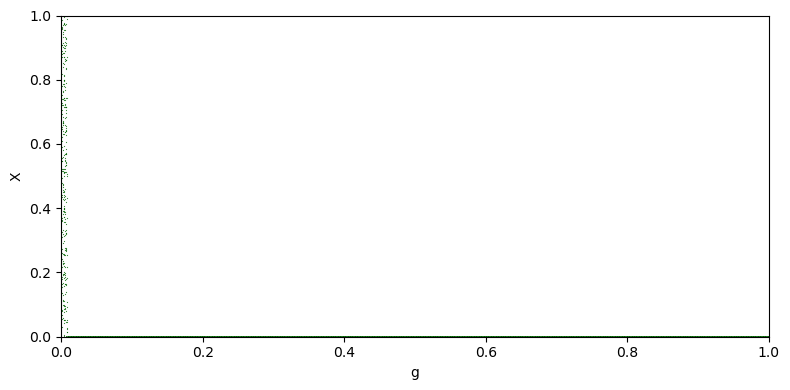

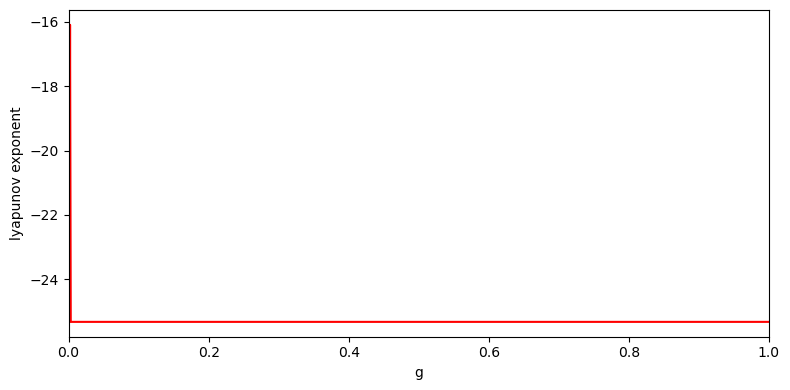

In [15]:
def orbit_and_lyapunov_extrapolating_learning_over_g(x0, x1, n_skip, n_iter, beta, tent, step=0.001):
    g_range = np.linspace(0, 1, int(1/step))
    lyap = []
    fig1, ax1 = plt.subplots(figsize=(8, 4))
    for g in g_range:
        x_vals = simulate_trend_extrapolating_learning(beta, x0, x1, g, tent, T=n_iter + n_skip, burn_in=n_skip)[0]
        ax1.scatter(np.full_like(x_vals, g), x_vals, s=0.75, color='darkgreen', alpha=0.8, linewidths=0)
        lyap.append(lyapunov_exponent_trend_extrapolating_learning(beta, x0, x1, g, tent))
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    ax1.set_xlabel('g')
    ax1.set_ylabel('X')
    plt.tight_layout()
    if tent=="tent":
        plt.savefig("Images/trend_extrapolating_learning_orbit_diagram_over_g.png", dpi=300)
    elif tent=="tent_ud":
        plt.savefig("Images/trend_extrapolating_learning_orbit_diagram_over_g_ud.png", dpi=300)
    plt.show()
    fig2, ax2 = plt.subplots(figsize=(8, 4))
    ax2.plot(g_range, lyap, color='red')
    ax2.set_xlim(0, 1)
    ax2.set_xlabel('g')
    ax2.set_ylabel('lyapunov exponent')
    plt.tight_layout()
    if tent=="tent":
        plt.savefig("Images/trend_extrapolating_learning_lyapunov_over_g.png", dpi=300)
    elif tent=="tent_ud":
        plt.savefig("Images/trend_extrapolating_learning_lyapunov_over_g_ud.png", dpi=300)
    plt.show()

orbit_and_lyapunov_extrapolating_learning_over_g(x0=0.2, x1=0.4, n_skip=200, n_iter=50, beta=0.0, tent="tent", step=0.001)

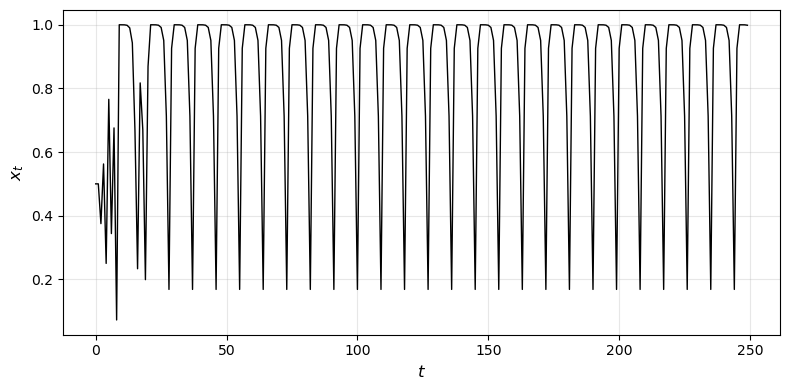

In [5]:
x = simulate_trend_extrapolating_learning(beta=0.6, x0=0.4, x1=0.40001, g=0.01, tent="tent", T = 200, burn_in=0)[0]

def plot_time_series(x, tent):
    plt.figure(figsize=(8, 4))
    plt.plot(range(len(x)), x, color='black', linewidth=1)
    plt.xlabel("$t$", fontsize=12)
    plt.ylabel("$x_t$", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    if tent=="tent":
        plt.savefig("Images/trend_extrapolating_learning_time_series.png")
    elif tent=="tent_ud":
        plt.savefig("Images/trend_extrapolating_learning_time_series_ud.png")
    else:
        return False
    plt.show()

plot_time_series(x, "tent")

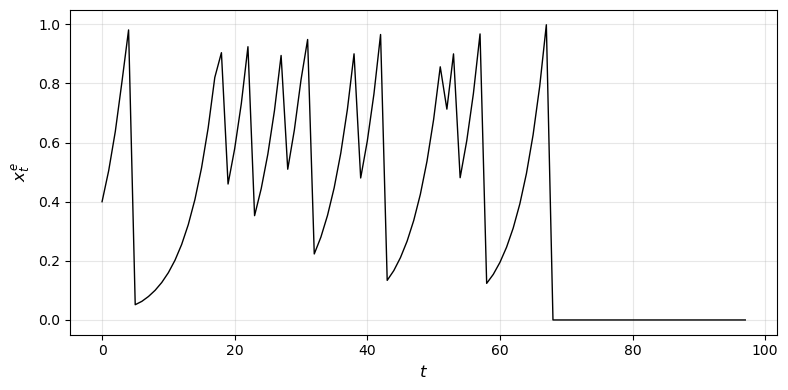

In [35]:
forecast_vals = simulate_trend_extrapolating_learning(beta=0.6, x0=0.4, x1=0.4, g=0.05, tent="tent", T = 100, burn_in=0)[1]

def plot_forecast_vals(x, tent):
    plt.figure(figsize=(8, 4))
    plt.plot(range(len(x)), x, color='black', linewidth=1)
    plt.xlabel("$t$", fontsize=12)
    plt.ylabel("$x^e_t$", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    if tent=="tent":
        plt.savefig("Images/trend_extrapolating_learning_forecast_vals.png")
    elif tent=="tent_ud":
        plt.savefig("Images/trend_extrapolating_learning_forecast_vals_ud.png")
    else:
        return False
    plt.show()

plot_forecast_vals(forecast_vals[3:], "tent")

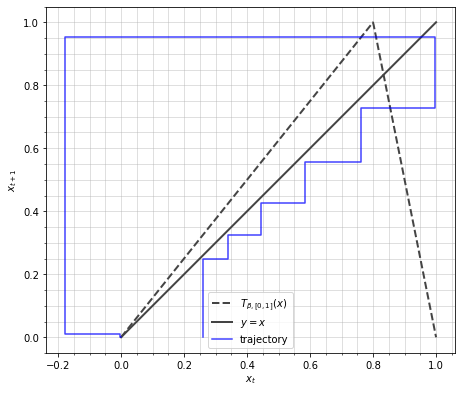

In [17]:
def tent_map(x, beta):
    x_arr   = np.asarray(x)
    thresh  = (1 + beta) / 2
    below   = 2 * x_arr / (1 + beta)
    above   = 2 * (1 - x_arr) / (1 - beta)
    return np.where(x_arr <= thresh, below, above)

def tent_map_ud(x, beta):
    return 1 - tent_map(x, beta)

dpi = 72


def plot_cobweb_trend_extrapolating_learning(beta, x0, x1, g, tent, n_iters=40, fname=None, figsize=(600, 450)):
    m_vals = []
    x_vals = [x0, x1] 
    if tent=="tent":
        for _ in range(n_iters):
            m_next = x_vals[-1] + g*(x_vals[-1] - x_vals[-2])
            m_vals.append(m_next)
            
            x_next  = tent_map_scalar(m_vals[-1], beta)    
            x_vals.append(x_next)
    elif tent=="tent_ud":
        for _ in range(n_iters):
            m_next = x_vals[-1] + g*(x_vals[-1] - x_vals[-2])
            m_vals.append(m_next)
            
            x_next  = tent_map_scalar_ud(m_vals[-1], beta)    
            x_vals.append(x_next)
    else:
        return False

    px, py = [m_vals[0]], [0]
    for i in range(n_iters - 1):
        px.append(m_vals[i])
        py.append(x_vals[i+1])

        px.append(m_vals[i+1])
        py.append(x_vals[i+1])

    x_plot = np.linspace(0, 1, 500)

    fig = plt.figure(figsize=(figsize[0]/dpi, figsize[1]/dpi), dpi=dpi)
    ax  = fig.add_subplot(111)

    if tent=="tent":
        ax.plot(x_plot, tent_map(x_plot, beta),  c='#444444', lw=2,
                label=r'$T_{\beta, [0, 1]}(x)$', linestyle='--')
    elif tent=="tent_ud":
        ax.plot(x_plot, tent_map_ud(x_plot, beta),  c='#444444', lw=2,
                label=r'$\hat{T}_{\beta, [0, 1]}(x)$', linestyle='--')
    else:
        return False
    ax.plot(x_plot, x_plot, c='#444444', lw=2, label=r'$y=x$')

    ax.plot(px, py, c='b', alpha=0.75, label='trajectory')

    ax.set_aspect('equal')
    ax.minorticks_on()
    ax.grid(which='both', alpha=0.5)
    ax.set_xlabel(r'$x_t$')
    ax.set_ylabel(r'$x_{t + 1}$')
    ax.legend(loc='best')

    if tent=="tent":
        plt.savefig("Images/trend_extrapolating_learning_cobweb.png")
    elif tent=="tent_ud":
        plt.savefig("Images/trend_extrapolating_learning_cobweb_ud.png")
    else:
        return False

beta = 0.60
x0   = 0.20
x1 = 0.25
g = 0.2
plot_cobweb_trend_extrapolating_learning(beta, x0, x1, g, tent="tent", n_iters=20)

### Now we go over to the upside-down tent map, again in combination with trend extrapolating learning

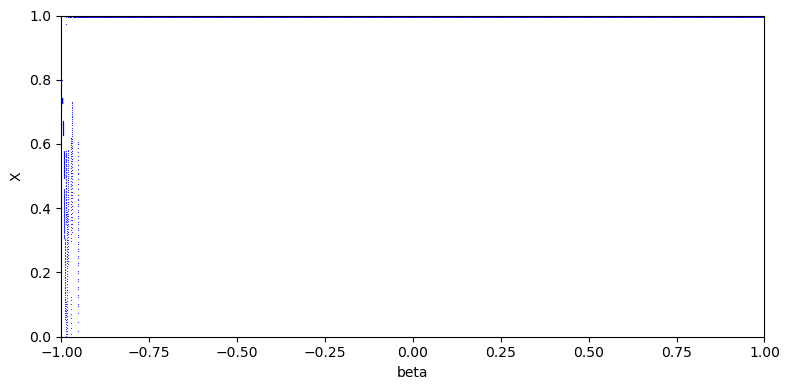

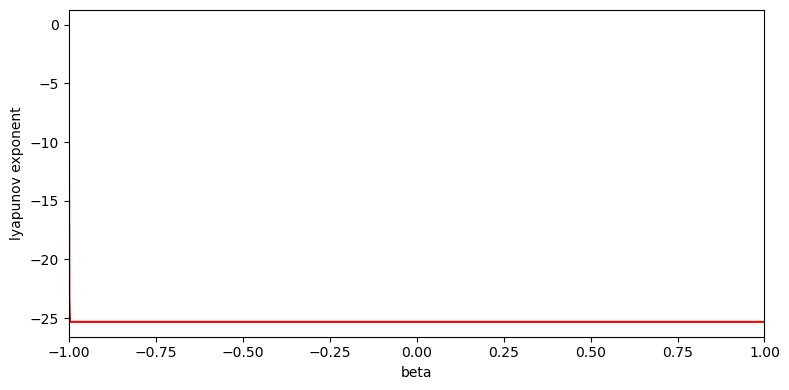

In [95]:
orbit_and_lyapunov_trend_extrapolating_learning(x0=0.8, x1=0.8, n_skip=200, n_iter=50, g=0.2, tent="tent_ud", step=0.001)

In [ ]:
orbit_and_lyapunov_extrapolating_learning_over_g(x0=0.2, x1=0.4, n_skip=200, n_iter=50, beta=0.0, tent="tent_ud", step=0.001)

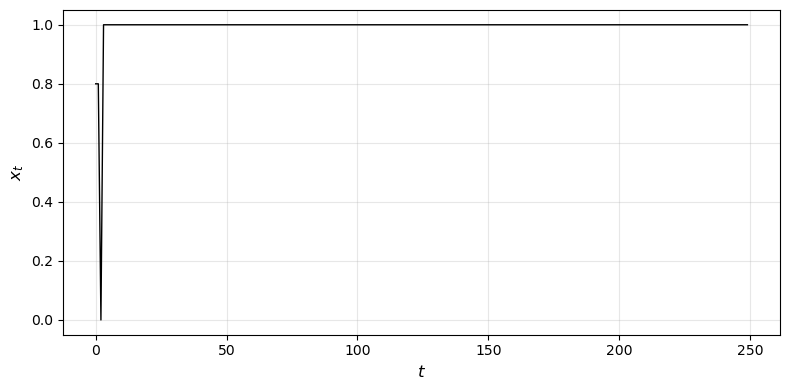

In [109]:
x = simulate_trend_extrapolating_learning(beta=0.6, x0=0.8, x1=0.8, g=0, tent="tent_ud", T = 250, burn_in=0)[0]

plot_time_series(x, "tent_ud")

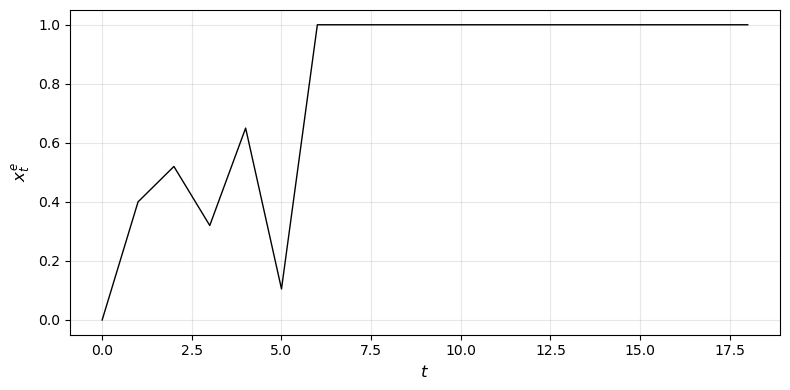

In [97]:
forecast_vals = simulate_trend_extrapolating_learning(beta=0.6, x0=0.4, x1=0.4, g=0.2, tent="tent_ud", T = 20, burn_in=0)[1]

plot_forecast_vals(forecast_vals[2:], "tent_ud")

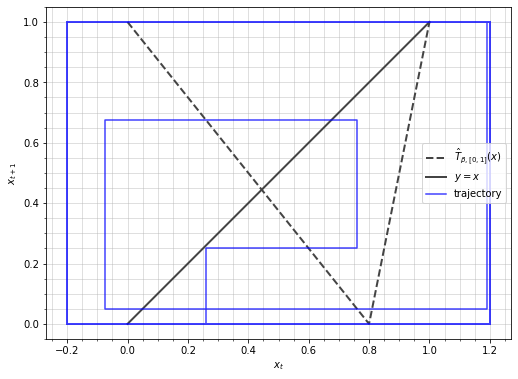

In [98]:
beta = 0.60
x0   = 0.20
x1 = 0.25
g = 0.2
plot_cobweb_trend_extrapolating_learning(beta, x0, x1, g, tent="tent_ud", n_iters=20)

### Now we replace the tent map by the tent map bounded between epsilon and 1 - epsilon, again in combination with trend extrapolation learning

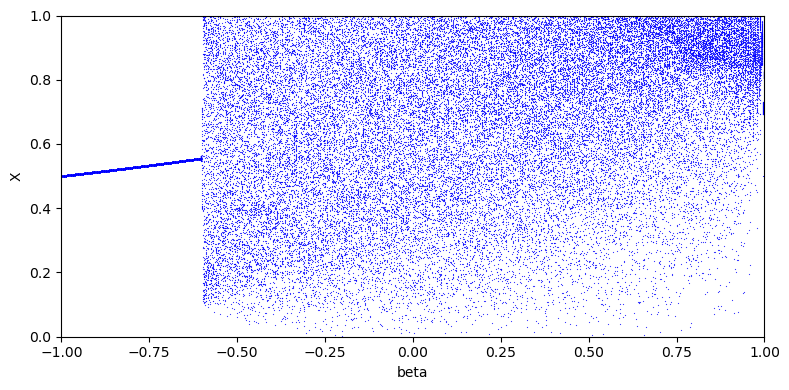

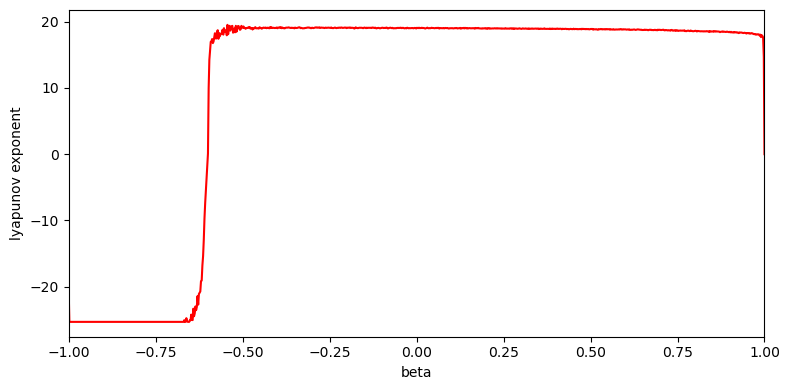

In [2]:
# Define the asymmetric tent map bounded by epsilon and 1 - epsilon
def tent_map_scalar_eps(x, beta, eps):
    if x <= (1 + beta) / 2 and x >= eps:
        return 2 * x / (1 + beta)
    elif x > (1 + beta) / 2 and x <= 1 - eps:
        return 2 * (1 - x) / (1 - beta)
    elif x < eps:
        return eps
    else:
        return 1 - eps

def tent_map_scalar_eps_ud(x, beta, eps):
    return 1 - tent_map_scalar_eps(x, beta, eps)

def trend_extrapolating_learning_forecast_eps(x, t, g, eps):
    forecast = x[t - 2] + g*(x[t - 2] - x[t - 3])
    if forecast > 1 - eps:
        forecast = 1 - eps
    elif forecast < eps:
        forecast = eps
    return forecast

# Simulate the system under learning by average
def simulate_trend_extrapolating_learning_eps(beta, x0, x1, g, eps, tent, T=1000, burn_in=200):
    x_vals = np.zeros(T)
    forecast_vals = np.zeros(T + 1)
    x_vals[0] = x0
    x_vals[1] = x1
    if tent=="tent":
        for t in range(2, T):
            forecast_vals[t + 1] = trend_extrapolating_learning_forecast_eps(x_vals, t + 1, g, eps)
            x_vals[t] = tent_map_scalar_eps(forecast_vals[t + 1], beta, eps)
    elif tent=="tent_ud":
        for t in range(2, T):
            forecast_vals[t + 1] = trend_extrapolating_learning_forecast_eps(x_vals, t + 1, g, eps)
            x_vals[t] = tent_map_scalar_eps_ud(forecast_vals[t + 1], beta, eps)
    else:
        return False
    # Do not include the first 200 values
    return x_vals[burn_in:], forecast_vals

def lyapunov_exponent_trend_extrapolating_learning_eps(beta, x0, x1, g, eps, tent, T=5000, burn_in=1000, bound=1e-9):
    x_base, _ = simulate_trend_extrapolating_learning_eps(beta, x0, x1, g, eps, tent, T=T, burn_in=0)
    x_pert, _ = simulate_trend_extrapolating_learning_eps(beta, x0 + bound, x1 + bound, g, eps, tent, T=T, burn_in=0)
    dist = np.abs(x_pert - x_base) + 1e-20
    return np.log(dist[burn_in:] / bound).mean()

def orbit_and_lyapunov_trend_extrapolating_learning_eps(x0, x1, n_skip, n_iter, g, eps, tent, step=0.001):
    beta_range = np.linspace(-1, 1, int(1/step))
    lyap = []
    fig1, ax1 = plt.subplots(figsize=(8, 4))
    for beta in beta_range:
        x_vals = simulate_trend_extrapolating_learning_eps(beta, x0, x1, g, eps, tent, T=n_iter + n_skip, burn_in=n_skip)[0]
        ax1.scatter(np.full_like(x_vals, beta), x_vals, s=0.75, color='blue', alpha=0.8, linewidths=0)
        lyap.append(lyapunov_exponent_trend_extrapolating_learning_eps(beta, x0, x1, g, eps, tent))
    ax1.set_xlim(-1, 1)
    ax1.set_ylim(0, 1)
    ax1.set_xlabel('beta')
    ax1.set_ylabel('X')
    plt.tight_layout()
    if tent=="tent":
        plt.savefig("Images/trend_extrapolating_learning_orbit_diagram_eps.png", dpi=300)
    elif tent=="tent_ud":
        plt.savefig("Images/trend_extrapolating_learning_orbit_diagram_eps_ud.png", dpi=300)
    plt.show()
    fig2, ax2 = plt.subplots(figsize=(8, 4))
    ax2.plot(beta_range, lyap, color='red')
    ax2.set_xlim(-1, 1)
    ax2.set_xlabel('beta')
    ax2.set_ylabel('lyapunov exponent')
    plt.tight_layout()
    if tent=="tent":
        plt.savefig("Images/trend_extrapolating_learning_lyapunov_eps.png", dpi=300)
    elif tent=="tent_ud":
        plt.savefig("Images/trend_extrapolating_learning_lyapunov_eps_ud.png", dpi=300)
    plt.show()

orbit_and_lyapunov_trend_extrapolating_learning_eps(x0=0.5, x1=0.5, n_skip=5000, n_iter=50, g=-0.8, eps = 10**(-5), tent="tent", step=0.001)

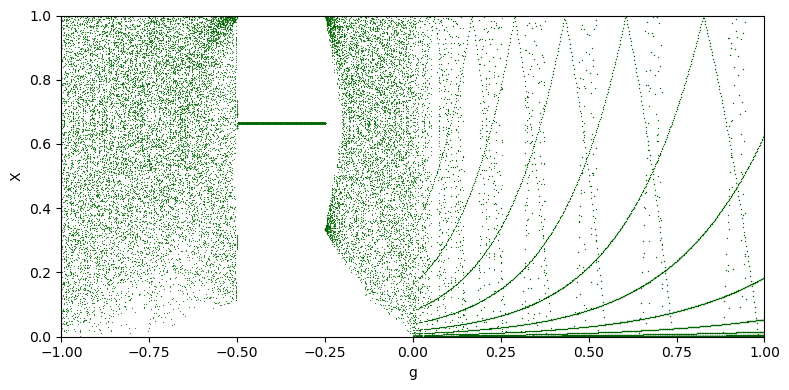

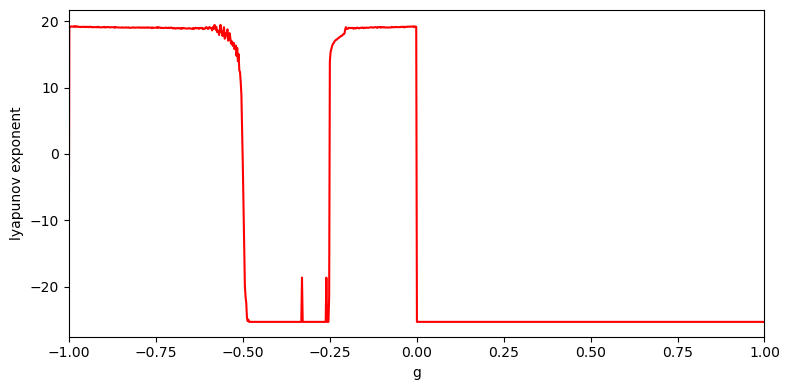

In [20]:
def orbit_and_lyapunov_extrapolating_learning_over_g_eps(x0, x1, n_skip, n_iter, beta, eps, tent, step=0.001):
    g_range = np.linspace(-1, 1, int(1/step))
    lyap = []
    fig1, ax1 = plt.subplots(figsize=(8, 4))
    for g in g_range:
        x_vals = simulate_trend_extrapolating_learning_eps(beta, x0, x1, g, eps, tent, T=n_iter + n_skip, burn_in=n_skip)[0]
        ax1.scatter(np.full_like(x_vals, g), x_vals, s=0.75, color='darkgreen', alpha=0.8, linewidths=0)
        lyap.append(lyapunov_exponent_trend_extrapolating_learning_eps(beta, x0, x1, g, eps, tent))
    ax1.set_xlim(-1, 1)
    ax1.set_ylim(0, 1)
    ax1.set_xlabel('g')
    ax1.set_ylabel('X')
    plt.tight_layout()
    if tent=="tent":
        plt.savefig("Images/trend_extrapolating_learning_orbit_diagram_over_g_eps.png", dpi=300)
    elif tent=="tent_ud":
        plt.savefig("Images/trend_extrapolating_learning_orbit_diagram_over_g_eps_ud.png", dpi=300)
    plt.show()
    fig2, ax2 = plt.subplots(figsize=(8, 4))
    ax2.plot(g_range, lyap, color='red')
    ax2.set_xlim(-1, 1)
    ax2.set_xlabel('g')
    ax2.set_ylabel('lyapunov exponent')
    plt.tight_layout()
    if tent=="tent":
        plt.savefig("Images/trend_extrapolating_learning_lyapunov_over_g_eps.png", dpi=300)
    elif tent=="tent_ud":
        plt.savefig("Images/trend_extrapolating_learning_lyapunov_over_g_eps_ud.png", dpi=300)
    plt.show()

orbit_and_lyapunov_extrapolating_learning_over_g_eps(x0=0.5, x1=0.5, n_skip=5000, n_iter=50, beta=0.0, eps=10**(-5), tent="tent", step=0.001)

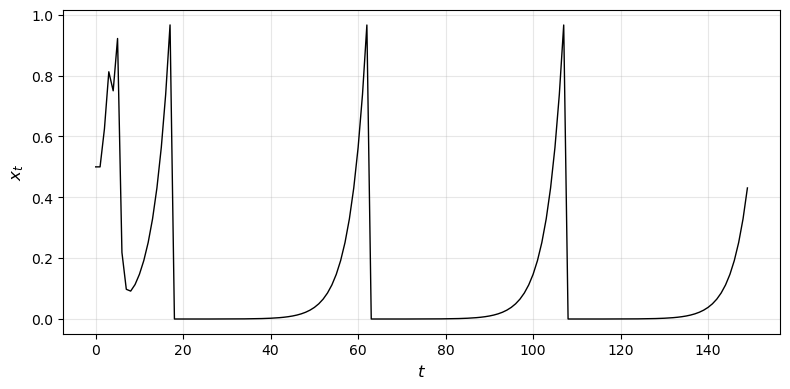

In [18]:
x = simulate_trend_extrapolating_learning_eps(beta=0.6, x0=0.5, x1=0.5, g=0.2, eps=10**(-5), tent="tent", T = 150, burn_in=0)[0]

def plot_time_series(x, tent):
    plt.figure(figsize=(8, 4))
    plt.plot(range(len(x)), x, color='black', linewidth=1)
    plt.xlabel("$t$", fontsize=12)
    plt.ylabel("$x_t$", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    if tent=="tent":
        plt.savefig("Images/trend_extrapolating_learning_time_series.png")
    elif tent=="tent_ud":
        plt.savefig("Images/trend_extrapolating_learning_time_series_ud.png")
    else:
        return False
    plt.show()

plot_time_series(x, "tent")

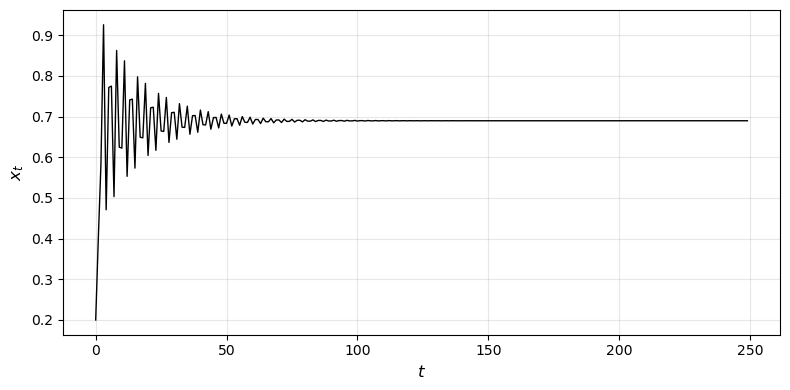

In [94]:
y = simulate_trend_extrapolating_learning_eps(beta=0.1, x0=0.2, x1=0.4, g=-0.4, eps=10**(-5), tent="tent", T = 250, burn_in=0)[0]

plot_time_series(y, "tent")

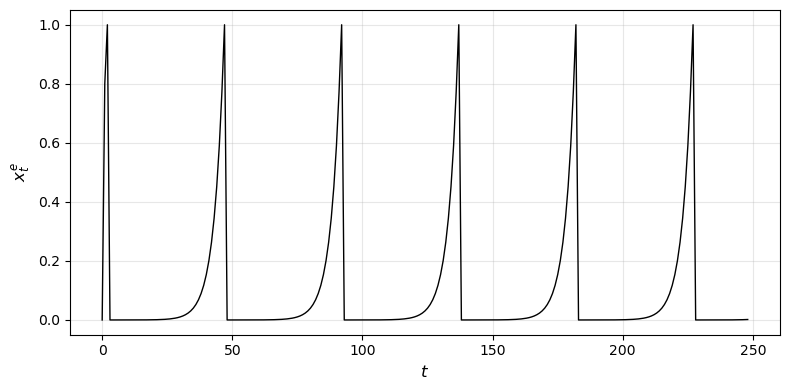

In [63]:
forecast_vals = simulate_trend_extrapolating_learning_eps(beta=0.6, x0=0.8, x1=0.8, g=0.2, eps=10**(-5), tent="tent", T = 250, burn_in=0)[1]

plot_forecast_vals(forecast_vals[2:], "tent")

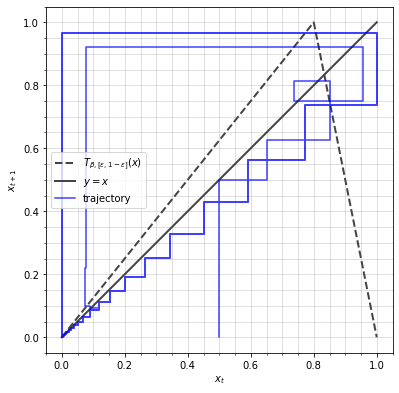

In [10]:
def tent_map_eps(x, beta, eps):
    x_arr  = np.clip(np.asarray(x, dtype=float), eps, 1.0 - eps)
    thresh = (1.0 + beta) / 2.0
    below  = 2.0 * x_arr / (1.0 + beta)
    above  = 2.0 * (1.0 - x_arr) / (1.0 - beta)
    y      = np.where(x_arr <= thresh, below, above)
    return np.clip(y, eps, 1.0 - eps)

def tent_map_eps_ud(x, beta, eps):
    return 1 - tent_map_eps(x, beta, eps)

dpi = 72


def plot_cobweb_trend_extrapolating_learning_eps(beta, x0, x1, g, eps, tent, n_iters=40, fname=None, figsize=(600, 450)):
    m_vals = []
    x_vals = [x0, x1] 
    if tent=="tent":
        for _ in range(n_iters):
            m_next = x_vals[-1] + g*(x_vals[-1] - x_vals[-2])
            if m_next > 1 - eps:
                m_next = 1 - eps
            elif m_next < eps:
                m_next = eps
            m_vals.append(m_next)
            
            x_next  = tent_map_scalar_eps(m_vals[-1], beta, eps)    
            x_vals.append(x_next)
    elif tent=="tent_ud":
        for _ in range(n_iters):
            m_next = x_vals[-1] + g*(x_vals[-1] - x_vals[-2])
            if m_next > 1 - eps:
                m_next = 1 - eps
            elif m_next < eps:
                m_next = eps
            m_vals.append(m_next)
            
            x_next  = tent_map_scalar_eps_ud(m_vals[-1], beta, eps)    
            x_vals.append(x_next)
    else:
        return False

    px, py = [m_vals[0]], [0]
    for i in range(n_iters - 1):
        px.append(m_vals[i])
        py.append(x_vals[i+1])

        px.append(m_vals[i+1])
        py.append(x_vals[i+1])

    x_plot = np.linspace(0, 1, 500)

    fig = plt.figure(figsize=(figsize[0]/dpi, figsize[1]/dpi), dpi=dpi)
    ax  = fig.add_subplot(111)

    if tent=="tent":
        ax.plot(x_plot, tent_map_eps(x_plot, beta, eps),  c='#444444', lw=2,
                label=r'$T_{\beta, [\varepsilon, 1 - \varepsilon]}(x)$', linestyle='--')
    elif tent=="tent_ud":
        ax.plot(x_plot, tent_map_eps_ud(x_plot, beta, eps),  c='#444444', lw=2,
                label=r'$\hat{T}_{\beta, [0, 1]}(x)$', linestyle='--')
    else:
        return False
    ax.plot(x_plot, x_plot, c='#444444', lw=2, label=r'$y=x$')

    ax.plot(px, py, c='b', alpha=0.75, label='trajectory')

    ax.set_aspect('equal')
    ax.minorticks_on()
    ax.grid(which='both', alpha=0.5)
    ax.set_xlabel(r'$x_t$')
    ax.set_ylabel(r'$x_{t + 1}$')
    ax.legend(loc='best')

    if tent=="tent":
        plt.savefig("Images/trend_extrapolating_learning_cobweb.png")
    elif tent=="tent_ud":
        plt.savefig("Images/trend_extrapolating_learning_cobweb_ud.png")
    else:
        return False

beta = 0.60
x0   = 0.50
x1 = 0.50
g = 0.2
plot_cobweb_trend_extrapolating_learning_eps(beta, x0, x1, g, eps=10**(-5), tent="tent", n_iters=100)

### Now again for the upside-down tent map

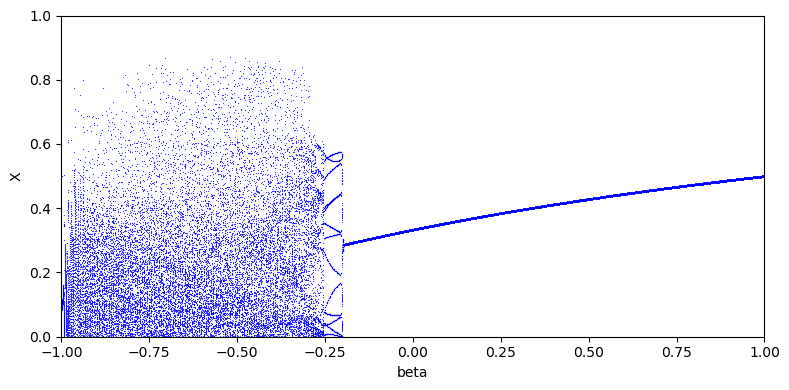

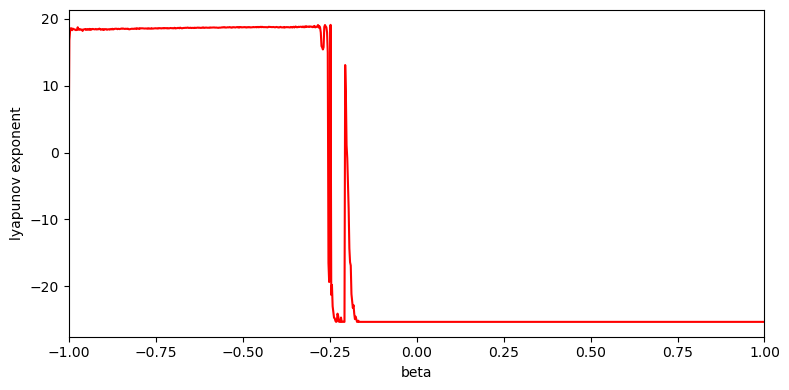

In [99]:
orbit_and_lyapunov_trend_extrapolating_learning_eps(x0=0.5, x1=0.5, n_skip=5000, n_iter=50, g=-0.4, eps = 10**(-5), tent="tent_ud", step=0.001)

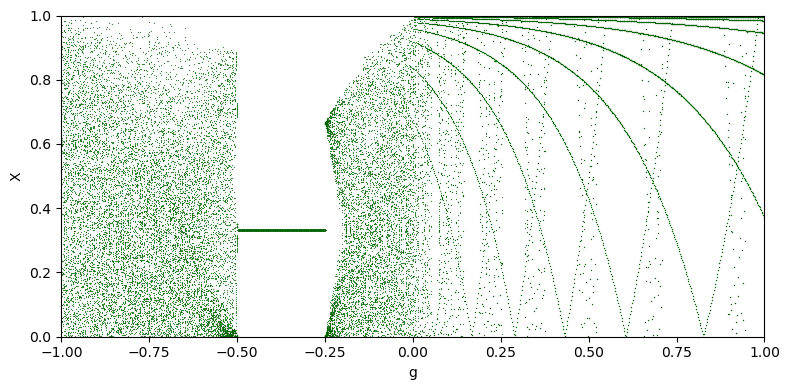

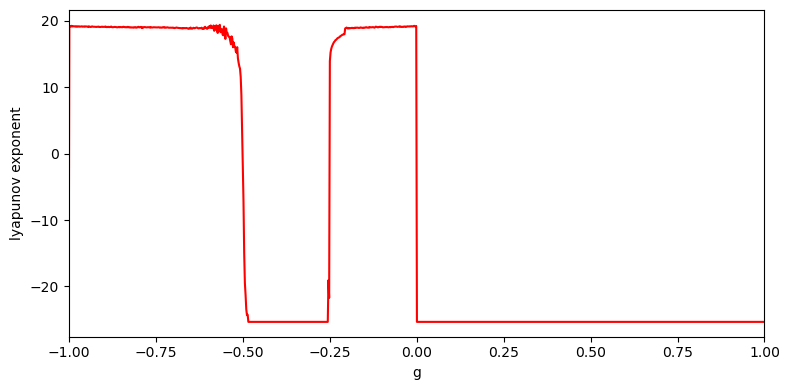

In [98]:
orbit_and_lyapunov_extrapolating_learning_over_g_eps(x0=0.5, x1=0.5, n_skip=5000, n_iter=50, beta=0.0, eps=10**(-5), tent="tent_ud", step=0.001)

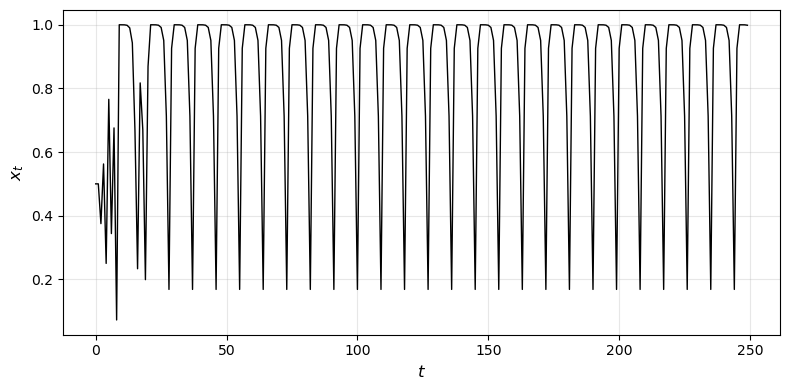

In [8]:
x = simulate_trend_extrapolating_learning_eps(beta=0.6, x0=0.5, x1=0.5, g=0.2, eps=10**(-5), tent="tent_ud", T = 250, burn_in=0)[0]

plot_time_series(x, "tent_ud")

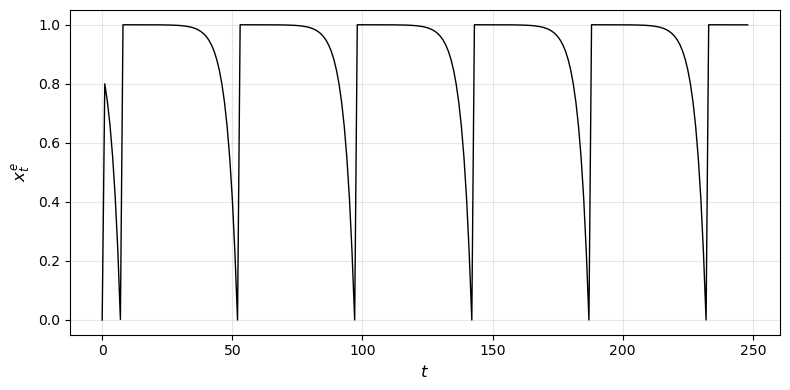

In [62]:
forecast_vals = simulate_trend_extrapolating_learning_eps(beta=-0.6, x0=0.8, x1=0.8, g=0.2, eps=10**(-5), tent="tent_ud", T = 250, burn_in=0)[1]

plot_forecast_vals(forecast_vals[2:], "tent_ud")

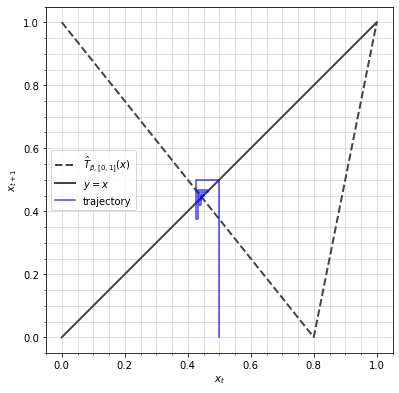

In [19]:
beta = 0.60
x0   = 0.50
x1 = 0.50
g = -0.4
plot_cobweb_trend_extrapolating_learning_eps(beta, x0, x1, g, eps=10**(-5), tent="tent_ud", n_iters=100)